In [15]:
from fileHandler import csvHandler,jsonHandler
import pandas as pd

jh_ = jsonHandler('kode_negara_lengkap.json')
dfJ = jh_.dataFrame
negara = 'Australia'
kode_negara = dfJ[dfJ['name']==negara]['alpha-3'].tolist()[0] 

ch_ = csvHandler('produksi_minyak_mentah.csv')
df = ch_.dataFrame

N = kode_negara

tahun = df[df['kode_negara']==N]['tahun'].tolist()
produksi = df[df['kode_negara']==N]['produksi'].tolist()

# Summary : df -> df (kode negaranya cuma AUS) 
# -> tahun dan produksi aja -> diubah ke list

dic = {'tahun':tahun,'produksi':produksi}
df_ = pd.DataFrame(dic)
dfJ['alpha-3'][243]

'VIR'

<module 'matplotlib.pyplot' from 'c:\\users\\piere\\appdata\\local\\programs\\python\\python38\\lib\\site-packages\\matplotlib\\pyplot.py'>

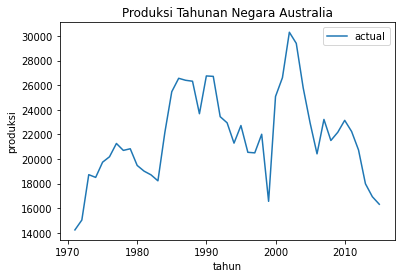

In [2]:
import matplotlib.pyplot as plt

plt.title('Produksi Tahunan Negara {}'.format(negara))
plt.plot(tahun,produksi,label='actual')
plt.xlabel('tahun')
plt.ylabel('produksi')
plt.legend()
plt

In [3]:
T = 2000
B = 5 #banyak negara

df = df[df['tahun']==T]
kode_negara = df[df['tahun']==T]['kode_negara'].tolist()
# produksi = df[df['tahun']==T]['produksi'].tolist()

produksi_maks = []
negara_pertahun = []

kode_negara = list(dict.fromkeys(kode_negara))
for kode in kode_negara:
    try:
        produksi = df[df['kode_negara']==kode]['produksi'].tolist()
        negara = dfJ[dfJ['alpha-3']==kode]['name'].tolist()[0]
        produksi_maks.append(max(produksi))
        negara_pertahun.append(negara)
    except:
        continue
        
dic = {'negara':negara_pertahun,'produksi_maks':produksi_maks}
df__ = pd.DataFrame(dic)
df__ = df__.sort_values('produksi_maks',ascending=False).reset_index()
df__

index                              negara  produksi_maks
0       73                        Saudi Arabia     410059.696
1       72                  Russian Federation     312820.807
2       29            United States of America     297512.886
3       56          Iran (Islamic Republic of)     196876.682
4      133  Venezuela (Bolivarian Republic of)     170920.626
..     ...                                 ...            ...
131     85                              Zambia          0.000
132     89                               Benin          0.000
133     91                            Botswana          0.000
134     94                          Costa Rica          0.000
135    135                            Zimbabwe          0.000

[136 rows x 3 columns]

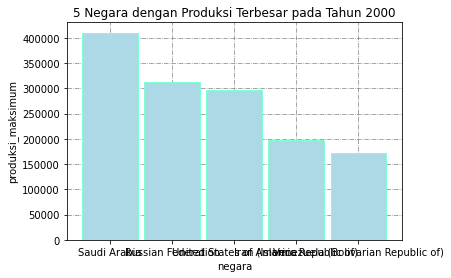

In [4]:
# plotting
plt.title('{B} Negara dengan Produksi Terbesar pada Tahun {T}'.format(B=B,T=T))
plt.bar(df__['negara'][:B],df__['produksi_maks'][:B],width=0.9, bottom=None, align="center",
            color="lightblue", edgecolor="aquamarine", data=None, zorder=3)
plt.grid(True, color="grey", linewidth="0.7", linestyle="-.", zorder=0)
plt.xlabel('negara')
plt.ylabel('produksi_maksimum')
plt.show()

In [20]:
import numpy as np

T = 2000

tahun = list(dict.fromkeys(df['tahun'].tolist()))

dic_maks = {'negara':[],
            'kode_negara':[],
            'region':[],
            'sub_region':[],
            'produksi':[],
            'tahun':tahun}
dic_min = {'negara':[],
            'kode_negara':[],
            'region':[],
            'sub_region':[],
            'produksi':[],
            'tahun':tahun}
dic_zero = {'negara':[],
            'kode_negara':[],
            'region':[],
            'sub_region':[],
            'produksi':[],
            'tahun':tahun}

for t in tahun:
    df_per_tahun = df[df['tahun']==t]
    produksi = np.array(df_per_tahun['produksi'].tolist())
    maks_prod = max(produksi)
    min_prod = min([p for p in produksi if p != 0])
    zero_prod = min([p for p in produksi if p == 0])
    # maksimum
    kode_negara = df_per_tahun[df_per_tahun['produksi']==maks_prod]['kode_negara'].tolist()[0]
    if kode_negara == 'WLD':
        kode_negara = 'WLF'
    dic_maks['negara'].append(dfJ[dfJ['alpha-3']==kode_negara]['name'].tolist()[0])
    dic_maks['kode_negara'].append(kode_negara)
    dic_maks['region'].append(dfJ[dfJ['alpha-3']==kode_negara]['region'].tolist()[0])
    dic_maks['sub_region'].append(dfJ[dfJ['alpha-3']==kode_negara]['sub-region'].tolist()[0])
    dic_maks['produksi'].append(maks_prod)
    # minimum != 0
    kode_negara = df_per_tahun[df_per_tahun['produksi']==min_prod]['kode_negara'].tolist()[0]
    if kode_negara == 'WLD':
        kode_negara = 'WLF'
    dic_min['negara'].append(dfJ[dfJ['alpha-3']==kode_negara]['name'].tolist()[0])
    dic_min['kode_negara'].append(kode_negara)
    dic_min['region'].append(dfJ[dfJ['alpha-3']==kode_negara]['region'].tolist()[0])
    dic_min['sub_region'].append(dfJ[dfJ['alpha-3']==kode_negara]['sub-region'].tolist()[0])
    dic_min['produksi'].append(min_prod)
    # zero == 0
    kode_negara = df_per_tahun[df_per_tahun['produksi']==zero_prod]['kode_negara'].tolist()[0]
    if kode_negara == 'WLD':
        kode_negara = 'WLF'
    dic_zero['negara'].append(dfJ[dfJ['alpha-3']==kode_negara]['name'].tolist()[0])
    dic_zero['kode_negara'].append(kode_negara)
    dic_zero['region'].append(dfJ[dfJ['alpha-3']==kode_negara]['region'].tolist()[0])
    dic_zero['sub_region'].append(dfJ[dfJ['alpha-3']==kode_negara]['sub-region'].tolist()[0])
    dic_zero['produksi'].append(zero_prod)

df_maks = pd.DataFrame(dic_maks)
df_min = pd.DataFrame(dic_min)
df_zero = pd.DataFrame(dic_zero)


negara kode_negara  region      sub_region  produksi  tahun
0   Belgium         BEL  Europe  Western Europe       0.0   1971
1   Belgium         BEL  Europe  Western Europe       0.0   1972
2   Belgium         BEL  Europe  Western Europe       0.0   1973
3   Belgium         BEL  Europe  Western Europe       0.0   1974
4   Belgium         BEL  Europe  Western Europe       0.0   1975
5   Belgium         BEL  Europe  Western Europe       0.0   1976
6   Belgium         BEL  Europe  Western Europe       0.0   1977
7   Belgium         BEL  Europe  Western Europe       0.0   1978
8   Belgium         BEL  Europe  Western Europe       0.0   1979
9   Belgium         BEL  Europe  Western Europe       0.0   1980
10  Belgium         BEL  Europe  Western Europe       0.0   1981
11  Belgium         BEL  Europe  Western Europe       0.0   1982
12  Belgium         BEL  Europe  Western Europe       0.0   1983
13  Belgium         BEL  Europe  Western Europe       0.0   1984
14  Belgium         BEL  Europe  Western Europe       0.0   1985
15  Belgium         BEL  Europe  Western Europe       0.0   1986
16  Belgium         BEL  Europe  Western Europe       0.0   1987
17  Belgium         BEL  Europe  Western Europe       0.0   1988
18  Belgium         BEL  Europe  Western Europe       0.0   1989
19  Belgium         BEL  Europe  Western Europe       0.0   1990
20  Belgium         BEL  Europe  Western Europe       0.0   1991
21  Belgium         BEL  Europe  Western Europe       0.0   1992
22  Belgium         BEL  Europe  Western Europe       0.0   1993
23  Belgium         BEL  Europe  Western Europe       0.0   1994
24  Belgium         BEL  Europe  Western Europe       0.0   1995
25  Belgium         BEL  Europe  Western Europe       0.0   1996
26  Belgium         BEL  Europe  Western Europe       0.0   1997
27  Belgium         BEL  Europe  Western Europe       0.0   1998
28  Belgium         BEL  Europe  Western Europe       0.0   1999
29  Belgium         BEL  Europe  Western Europe       0.0   2000
30  Belgium         BEL  Europe  Western Europe       0.0   2001
31  Belgium         BEL  Europe  Western Europe       0.0   2002
32  Belgium         BEL  Europe  Western Europe       0.0   2003
33  Belgium         BEL  Europe  Western Europe       0.0   2004
34  Belgium         BEL  Europe  Western Europe       0.0   2005
35  Belgium         BEL  Europe  Western Europe       0.0   2006
36  Belgium         BEL  Europe  Western Europe       0.0   2007
37  Belgium         BEL  Europe  Western Europe       0.0   2008
38  Belgium         BEL  Europe  Western Europe       0.0   2009
39  Belgium         BEL  Europe  Western Europe       0.0   2010
40  Belgium         BEL  Europe  Western Europe       0.0   2011
41  Belgium         BEL  Europe  Western Europe       0.0   2012
42  Belgium         BEL  Europe  Western Europe       0.0   2013
43  Belgium         BEL  Europe  Western Europe       0.0   2014
44  Belgium         BEL  Europe  Western Europe       0.0   2015